In [1]:
import yt
import os

In [2]:
path = '/gpfs/projects/CalderGroup/KianSpace/sedov_runs/results2'
os.chdir(path)
os.getcwd()

'/gpfs/projects/CalderGroup/KianSpace/sedov_runs/results2'

In [9]:
ds = yt.load('sedov_hdf5_plt_cnt_*')

In [ ]:
field = ('flash', 'temp')

for ds in ds:
    slc = yt.SlicePlot(ds, 'z', field)
    slc.set_cmap(field, 'inferno')
    slc.zoom(10)
    slc.save('/gpfs/projects/CalderGroup/KianSpace/reu2023/plots/sedov/june-29/')

In [11]:
import yt
import unyt
from yt.units import dimensions
from yt.visualization.volume_rendering.transfer_function_helper import TransferFunctionHelper
from yt.visualization.volume_rendering.api import Scene, create_volume_source, Camera, ColorTransferFunction

In [13]:
ds = yt.load('sedov_hdf5_plt_cnt_0060')

yt : [INFO     ] 2023-06-29 12:59:27,983 Parameters: current_time              = 0.00030027798340696545
yt : [INFO     ] 2023-06-29 12:59:27,985 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2023-06-29 12:59:27,988 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-29 12:59:27,991 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-06-29 12:59:27,993 Parameters: cosmological_simulation   = 0


In [36]:
field = ('flash', 'temp')
sc = Scene()

# Setting the radius of the sphere that's rendered
radius = 0.5

# Setting up the data to render as the Source part of the Scene (sc)
core = ds.sphere(ds.domain_center, (radius, 'mm'))
my_source = create_volume_source(core, field)

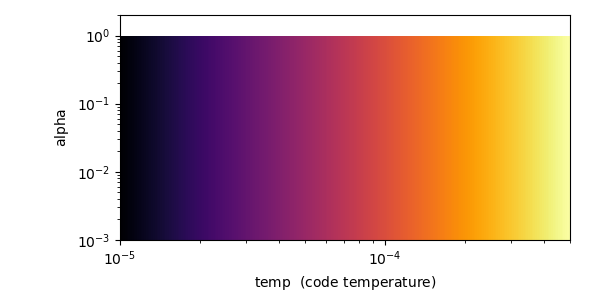

In [59]:
### Transfer Function (Coloring)
import numpy as np

nlayers = 100
bounds = (1e-5, 5e-4)
# setup our transfer function
tfh = TransferFunctionHelper(ds) # this object helps with some of the syntax
tfh.set_field(field) # set what field we are looking at. Should match the source.
tfh.set_log(True) # volume rendering generally looks best in logspace
tfh.grey_opacity = False
tfh.set_bounds(bounds) 
tfh.build_transfer_function() # this generates a blank transfer function that we can add gaussians to.

#tfh.tf.add_layers(
    #nlayers,
    #w=0.01,
    #mi=np.log10(bounds[0]),
    #ma=np.log10(bounds[1]),
    #col_bounds=[bounds[0], bounds[1]],
    #alpha=np.logspace(-9, -5, 7),
    #colormap="inferno",
#)

tfh.tf.map_to_colormap(np.log10(bounds[0]), np.log10(bounds[1]), colormap="inferno")

my_source.transfer_function = tfh.tf

tfh.plot()

In [66]:
### Camera
#Adding source to scene
sc.add_source(my_source)

# Add a camera to scene
sc.add_camera(ds, lens_type="perspective")

# Set camera properties
sc.camera.focus = ds.domain_center #point cam to center
sc.camera.resolution = 540 #set the resolution
sc.camera.north_vector = unyt.unyt_array([0., 1., 0.], 'mm') # set "up" to be y-direction. Note size doesn't matter.

# set the physical position of the camera. 
# Want to be far enough from center that we see the whole Source.
sc.camera.position = ds.domain_center + unyt.unyt_array([0., 0., 1], 'mm') # moving 3x away along z-direction
sc.camera.set_width((radius, 'mm'))

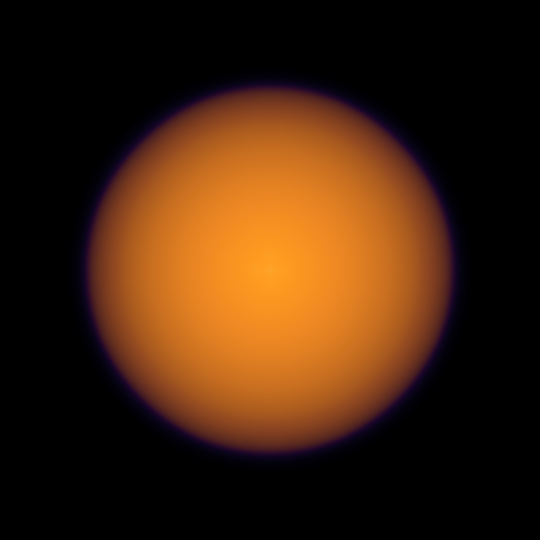

In [67]:
sc.render()
sc.show()

In [4]:
import os
import yt

In [3]:
os.chdir('/gpfs/projects/CalderGroup/KianSpace/sedov_runs/results2')

In [9]:
data_set = yt.load('sedov_hdf5_plt_cnt_000*')
print(data_set)
i = 0

for i,data in enumerate(data_set):
    print(data)
    print(i)
    i = i + 1

yt : [INFO     ] 2023-06-30 14:12:51,831 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-06-30 14:12:51,834 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2023-06-30 14:12:51,837 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-30 14:12:51,840 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-06-30 14:12:51,842 Parameters: cosmological_simulation   = 0


sedov_hdf5_plt_cnt_0000
0


yt : [INFO     ] 2023-06-30 14:12:51,946 Parameters: current_time              = 5.0095432776886575e-06
yt : [INFO     ] 2023-06-30 14:12:51,949 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2023-06-30 14:12:51,951 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-30 14:12:51,954 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-06-30 14:12:51,957 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-06-30 14:12:52,063 Parameters: current_time              = 1.0230082248354854e-05
yt : [INFO     ] 2023-06-30 14:12:52,067 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2023-06-30 14:12:52,069 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-30 14:12:52,072 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-06-30 14:12:52,075 Parameters: cosmological_simulation   = 0


sedov_hdf5_plt_cnt_0001
1
sedov_hdf5_plt_cnt_0002
2


yt : [INFO     ] 2023-06-30 14:12:52,180 Parameters: current_time              = 1.542181715691426e-05
yt : [INFO     ] 2023-06-30 14:12:52,183 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2023-06-30 14:12:52,185 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-30 14:12:52,188 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-06-30 14:12:52,191 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-06-30 14:12:52,267 Parameters: current_time              = 2.052557347620606e-05
yt : [INFO     ] 2023-06-30 14:12:52,269 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2023-06-30 14:12:52,271 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-30 14:12:52,273 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-06-30 14:12:52,275 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-06-30 14:12:52,344 Parameters: current_time           

sedov_hdf5_plt_cnt_0003
3
sedov_hdf5_plt_cnt_0004
4
sedov_hdf5_plt_cnt_0005
5


yt : [INFO     ] 2023-06-30 14:12:52,424 Parameters: current_time              = 3.000145877739104e-05
yt : [INFO     ] 2023-06-30 14:12:52,426 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2023-06-30 14:12:52,428 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-30 14:12:52,429 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-06-30 14:12:52,431 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-06-30 14:12:52,502 Parameters: current_time              = 3.5476434008844384e-05
yt : [INFO     ] 2023-06-30 14:12:52,504 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2023-06-30 14:12:52,506 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-30 14:12:52,508 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-06-30 14:12:52,510 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-06-30 14:12:52,580 Parameters: current_time          

sedov_hdf5_plt_cnt_0006
6
sedov_hdf5_plt_cnt_0007
7
sedov_hdf5_plt_cnt_0008
8


yt : [INFO     ] 2023-06-30 14:12:52,659 Parameters: current_time              = 4.517133000088353e-05
yt : [INFO     ] 2023-06-30 14:12:52,661 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2023-06-30 14:12:52,663 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-30 14:12:52,665 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-06-30 14:12:52,667 Parameters: cosmological_simulation   = 0


sedov_hdf5_plt_cnt_0009
9
